In [3]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

def loadCSV(filename):
    f = open(filename)
    data = np.loadtxt(f, delimiter=',')
    X = data[:, 1:]
    y = data[:, 0]
    return X, y

def error(w, X, y):
    N = y.shape[0]
    assert X.shape[0] == N
    wrong = 0.0
    for i in range(N):
        prediction = np.dot(w, X[i, :])
        if prediction * y[i] <= 0.0:
            wrong += 1
    return wrong / N

X, y = loadCSV("banana.csv")
N = X.shape[0]
X_train = X[0:N//2, :]
y_train = y[0:N//2]
X_test = X[N//2:N, :]
y_test = y[N//2:N]

ks = [1, 3, 5, 7, 9, 19, 29, 49, 99, 199, 299, 499, 999]

for k in ks:
    model = KNeighborsClassifier(k)
    model.fit(X_train, y_train)
    print("[" + str(k) + "-NN]  training error:" + str(1 - model.score(X_train, y_train)) + "  test error: " + str(1 - model.score(X_test, y_test)))


[1-NN]  training error:0.0  test error: 0.13471698113207542
[3-NN]  training error:0.060377358490566024  test error: 0.11811320754716981
[5-NN]  training error:0.07358490566037734  test error: 0.10603773584905662
[7-NN]  training error:0.08188679245283015  test error: 0.09924528301886792
[9-NN]  training error:0.0860377358490566  test error: 0.10226415094339625
[19-NN]  training error:0.08716981132075474  test error: 0.10075471698113203
[29-NN]  training error:0.08867924528301885  test error: 0.1015094339622642
[49-NN]  training error:0.09245283018867922  test error: 0.10113207547169811
[99-NN]  training error:0.09698113207547165  test error: 0.10339622641509438
[199-NN]  training error:0.11584905660377354  test error: 0.1264150943396226
[299-NN]  training error:0.1505660377358491  test error: 0.15584905660377357
[499-NN]  training error:0.19207547169811323  test error: 0.19735849056603771
[999-NN]  training error:0.3241509433962264  test error: 0.330566037735849


The best value is $k = 7$, however, a wide range of values from 5 to 99 works well. The error rate is in the same range as the one we obtained with a degree-7 polynomial fit, and it is much lower than with a linear model.

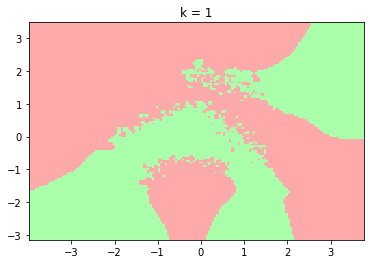

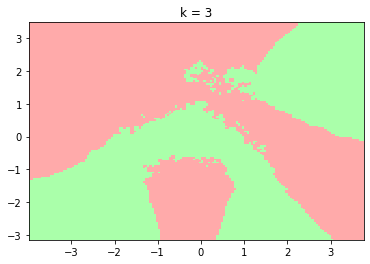

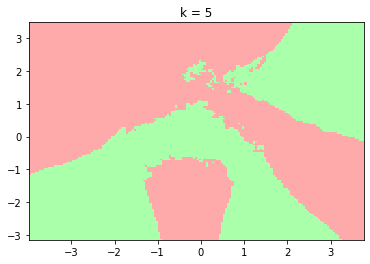

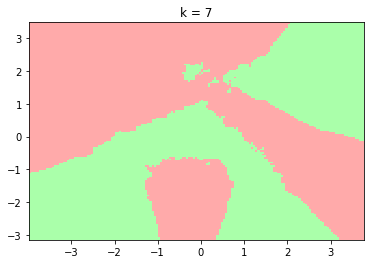

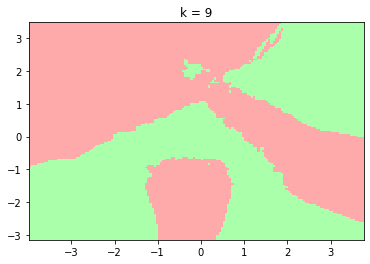

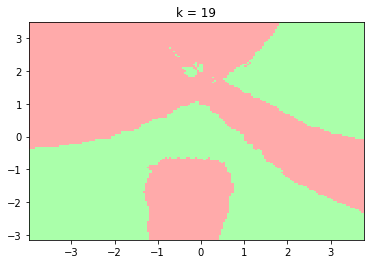

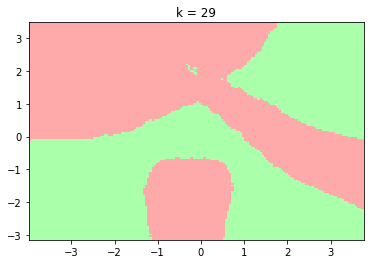

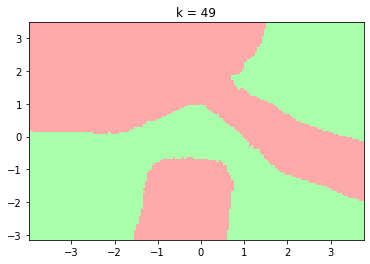

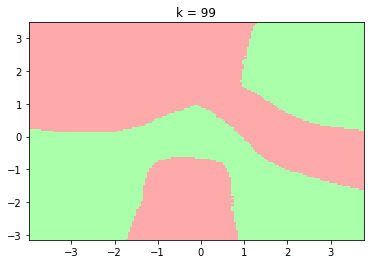

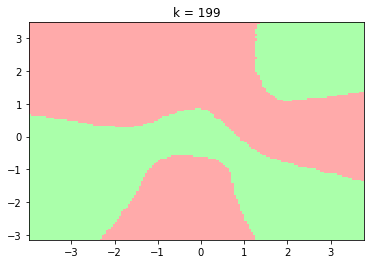

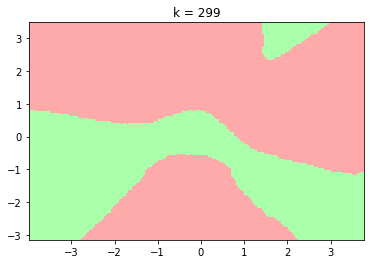

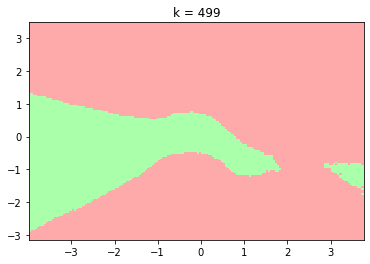

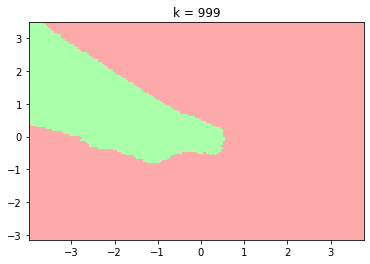

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

# mesh resolution
h = 0.05

for k in ks:
    model = KNeighborsClassifier(k)
    model.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # range and decoration
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("k = " + str(k))

plt.show()


For small $k$ we observe a rather rugged decision boundary, resulting in over-fitting. For increasing $k$ the decision boundary becomes more and more smooth, giving better results. For too large $k$, the decision boundary is over-simplified, ignoring whole clusters of points, resulting in under-fitting.